# **Property Median Value and Median Tax**

## Analysis of Property Housing Data for District 7

In this notebook, we will analyze property housing data to provide insights into two key issues for District 7:

1. **The median and mean property evaluations and their increase over the years.**
2. **The median and mean property taxes and their increase over the years.**

These metrics will be compared against the Boston citywide averages to understand how District 7 differs from the rest of the city.

### Tasks to Achieve These Insights:

- **Data Cleaning**: We will handle missing values, remove duplicates, and ensure consistency in data formats. This includes filtering the dataset to focus on properties that belong to District 7 (`IS_D7`) or not.

- **Data Understanding**: We will review the metadata to interpret the meaning of each column. Key attributes of interest include:
  - **Total Property Price**
  - **Gross Tax**
  
  These attributes will help us contextualize property values and taxes.

- **Data Visualization**: We will create visualizations to compare trends over time. Specifically, we’ll analyze housing prices and property taxes in District 7 and compare these trends to Boston as a whole.

- **Analysis and Insights**: Finally, we will identify key patterns in the data. These insights will help inform policy or decision-making related to housing prices and property taxes, highlighting how District 7 might differ from the Boston average.

This outline provides a clear path for the analysis, emphasizing the comparison between District 7’s metrics and those of Boston as a whole.



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)

In [59]:
boston_df = pd.read_csv("../data/d7-property-new.csv", low_memory=False)

There is a special case in `GROSS_TAX` where the missing values are denoted as " $-   " insread of simply leaving them empty. We will impute it with `NaN`.

In [60]:
boston_df["GROSS_TAX"]

0                925623
1                861750
2                895373
3                774058
4               2279064
               ...     
1055419      $4,573.64 
1055420      $5,104.47 
1055421      $5,150.25 
1055422     $62,143.98 
1055423           $-   
Name: GROSS_TAX, Length: 1055424, dtype: object

In [61]:
boston_df["GROSS_TAX"] = boston_df["GROSS_TAX"].replace(" $-   ", np.nan)

In [71]:
boston_df["GROSS_TAX"] = boston_df["GROSS_TAX"].replace({"\\$": "", ",": ""}, regex=True).astype(float)
boston_df["AV_TOTAL"] = boston_df["AV_TOTAL"].replace({"\\$": "", ",": ""}, regex=True).astype(float)
boston_df = boston_df[boston_df["AV_TOTAL"] != 0]
district7_df = boston_df[boston_df.IS_D7 == 1]

In [73]:
district7_results = district7_df.groupby("YEAR").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")
    ).reset_index()

boston_results = boston_df.groupby("YEAR").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")).reset_index()

In [74]:
boston_results

,YEAR,mean_housing_price,std_housing_price,median_housing_price,median_gross_tax,mean_gross_tax
0,2019,"2,618,581.51","32,727,579.88","502,600.00","518,779.00","1,595,315.89"
1,2020,"1,345,877.37","12,151,774.88","533,550.00","5,563.01","15,266.53"
2,2021,"1,423,316.97","12,708,686.03","576,900.00","5,806.62","15,253.12"
3,2022,"1,494,220.99","13,633,658.95","599,500.00","6,449.66","17,056.08"
4,2023,"1,577,181.80","14,481,508.81","637,400.00","6,761.91","17,798.51"
5,2024,"1,608,589.95","14,796,836.18","662,100.00","7,362.95","19,521.28"


In [75]:
def calculate_percentage_change(prices):
    return [0] + [
        ((prices.iloc[i] - prices.iloc[i - 1]) / prices.iloc[i - 1]) * 100
        for i in range(1, len(prices))
    ]

# Calculate percentage changes for district7
district7_median_percentage_change = calculate_percentage_change(district7_results["median_housing_price"])
district7_mean_percentage_change = calculate_percentage_change(district7_results["mean_housing_price"])
district7_median_tax_percentage_change = calculate_percentage_change(district7_results["median_gross_tax"])
district7_mean_tax_percentage_change = calculate_percentage_change(district7_results["mean_gross_tax"])

# Calculate percentage changes for boston
boston_median_percentage_change = calculate_percentage_change(boston_results["median_housing_price"])
boston_mean_percentage_change = calculate_percentage_change(boston_results["mean_housing_price"])
boston_median_tax_percentage_change = calculate_percentage_change(boston_results["median_gross_tax"])
boston_mean_tax_percentage_change = calculate_percentage_change(boston_results["mean_gross_tax"])

# Round the percentage change lists to 2 decimal places
district7_median_percentage_change = [round(value, 2) for value in district7_median_percentage_change]
district7_mean_percentage_change = [round(value, 2) for value in district7_mean_percentage_change]
district7_median_tax_percentage_change = [round(value, 2) for value in district7_median_tax_percentage_change]
district7_mean_tax_percentage_change = [round(value, 2) for value in district7_mean_tax_percentage_change]

boston_median_percentage_change = [round(value, 2) for value in boston_median_percentage_change]
boston_mean_percentage_change = [round(value, 2) for value in boston_mean_percentage_change]
boston_median_tax_percentage_change = [round(value, 2) for value in boston_median_tax_percentage_change]
boston_mean_tax_percentage_change = [round(value, 2) for value in boston_mean_tax_percentage_change]

# Print the final results
print("District 7 Median Percentage Change:", district7_median_percentage_change)
print("District 7 Mean Percentage Change:", district7_mean_percentage_change)
print("District 7 Median Tax Percentage Change:", district7_median_tax_percentage_change)
print("District 7 Mean Tax Percentage Change:", district7_mean_tax_percentage_change)
print("Boston Median Percentage Change:", boston_median_percentage_change)
print("Boston Mean Percentage Change:", boston_mean_percentage_change)
print("Boston Median Tax Percentage Change:", boston_median_tax_percentage_change)
print("Boston Mean Tax Percentage Change:", boston_mean_tax_percentage_change)

District 7 Median Percentage Change: [0, np.float64(6.5), np.float64(10.15), np.float64(3.76)]
District 7 Mean Percentage Change: [0, np.float64(-37.99), np.float64(3.29), np.float64(6.74)]
District 7 Median Tax Percentage Change: [0, np.float64(-98.92), np.float64(5.52), np.float64(11.72)]
District 7 Mean Tax Percentage Change: [0, np.float64(-98.98), np.float64(0.75), np.float64(14.02)]
Boston Median Percentage Change: [0, np.float64(6.16), np.float64(8.12), np.float64(3.92), np.float64(6.32), np.float64(3.88)]
Boston Mean Percentage Change: [0, np.float64(-48.6), np.float64(5.75), np.float64(4.98), np.float64(5.55), np.float64(1.99)]
Boston Median Tax Percentage Change: [0, np.float64(-98.93), np.float64(4.38), np.float64(11.07), np.float64(4.84), np.float64(8.89)]
Boston Mean Tax Percentage Change: [0, np.float64(-99.04), np.float64(-0.09), np.float64(11.82), np.float64(4.35), np.float64(9.68)]


IndexError: list index out of range

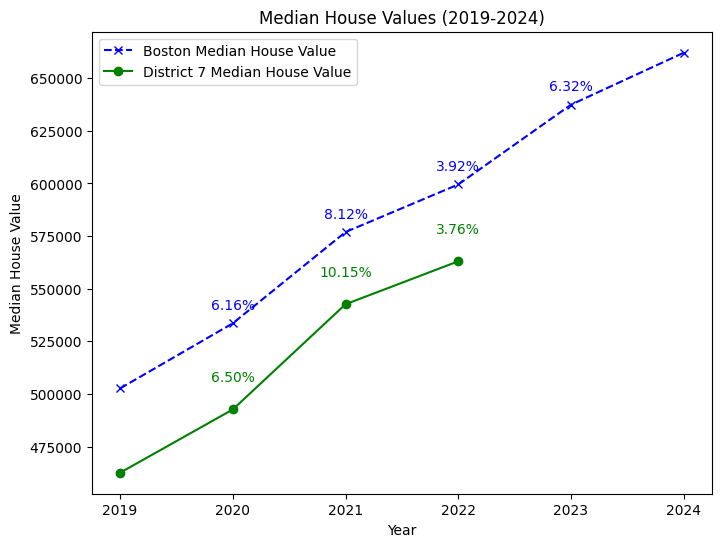

In [77]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["median_housing_price"], 
         linestyle="--", marker="x", label="Boston Median House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["median_housing_price"], 
         marker="o", label="District 7 Median House Value", color="green")

# Title and labels
plt.title("Median House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"])):
    plt.annotate(f"{boston_median_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


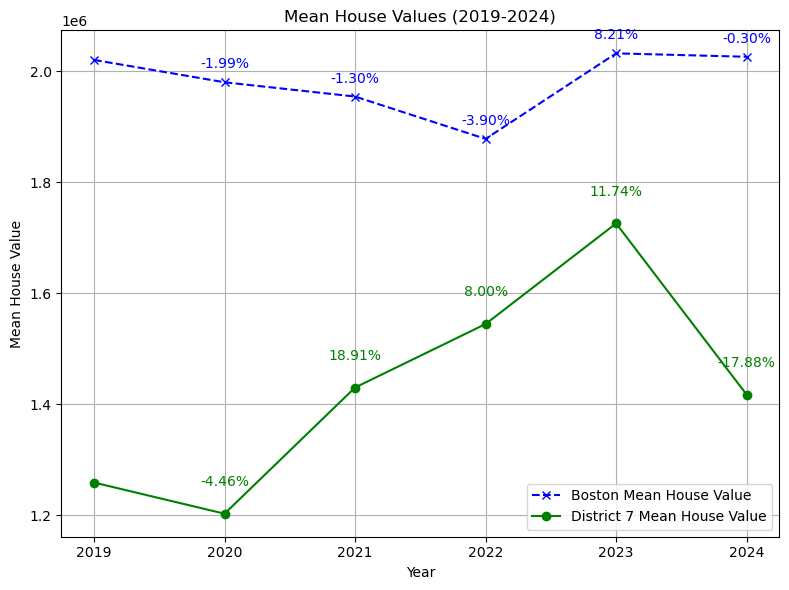

In [ ]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["mean_housing_price"], 
         linestyle="--", marker="x", label="Boston Mean House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["mean_housing_price"], 
         marker="o", label="District 7 Mean House Value", color="green")

# Title and labels
plt.title("Mean House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_mean_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


IndexError: list index out of range

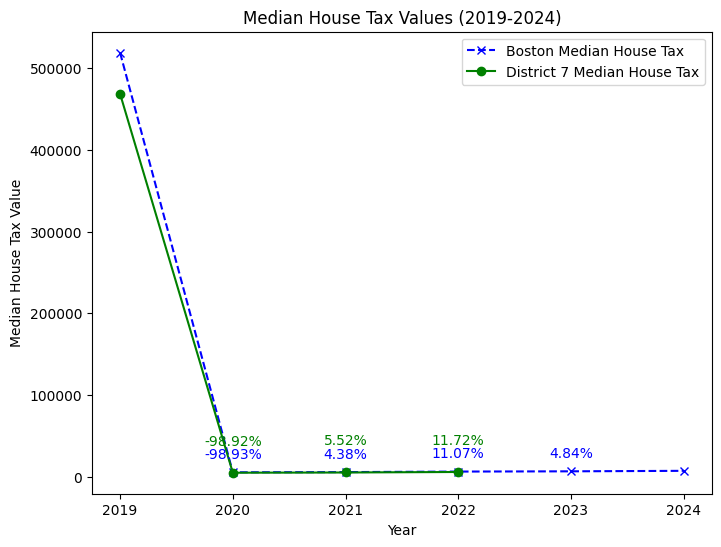

In [78]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["median_gross_tax"], 
         linestyle="--", marker="x", label="Boston Median House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["median_gross_tax"], 
         marker="o", label="District 7 Median House Tax", color="green")

# Title and labels
plt.title("Median House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Tax Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"])):
    plt.annotate(f"{boston_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


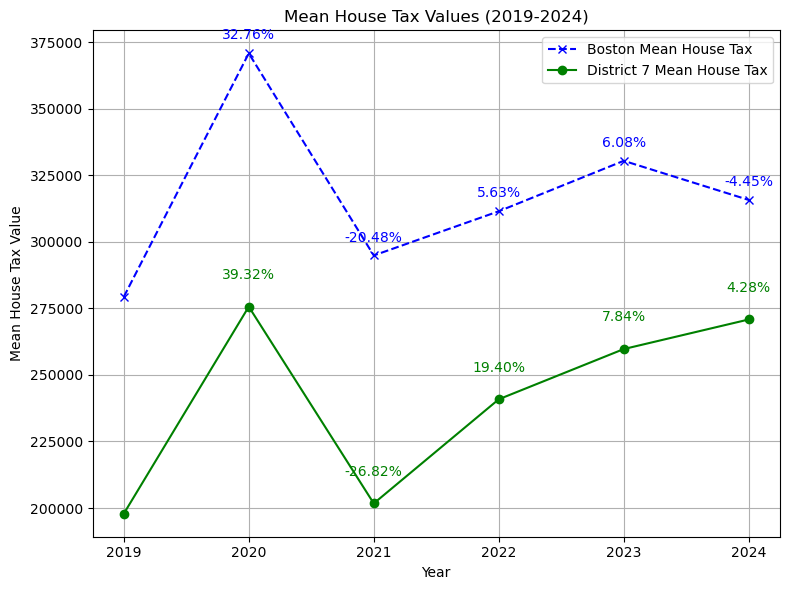

In [ ]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["mean_gross_tax"], 
         linestyle="--", marker="x", label="Boston Mean House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["mean_gross_tax"], 
         marker="o", label="District 7 Mean House Tax", color="green")

# Title and labels
plt.title("Mean House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Tax Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
